### imports

In [1]:
import pandas as pd 
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### dataset

In [2]:
from pathlib import Path
root=Path('data')
root.mkdir(exist_ok=True)
path= root / "shakespeare.txt"

In [3]:
with open(path, "r") as f:
    plays = f.read()
#plays

## prepocessing

### lower

In [4]:
plays= plays.lower()
#plays

### senntence list

In [5]:
snentence=plays.split('\n')
#snentence

### remove punctuation

In [6]:
import string
exclude=string.punctuation + '\n' +'1'+'2'+'3'+'4'+'5'+'6'+'7'+'8'+'9'+'0'
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n1234567890'

In [7]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [8]:
sentence_list=[]
for sen in range(len(snentence)):
    sentence_list.append(remove_punc(str(snentence[sen])))
len(sentence_list)

124186

### remove unwanted spaces

In [9]:
for sen in range(len(sentence_list)):
    sentence_list[sen]=sentence_list[sen].strip(" ")
sentence_list

['from fairest creatures we desire increase',
 'that thereby beautys rose might never die',
 'but as the riper should by time decease',
 'his tender heir might bear his memory',
 'but thou contracted to thine own bright eyes',
 'feedst thy lights flame with selfsubstantial fuel',
 'making a famine where abundance lies',
 'thy self thy foe to thy sweet self too cruel',
 'thou that art now the worlds fresh ornament',
 'and only herald to the gaudy spring',
 'within thine own bud buriest thy content',
 'and tender churl makst waste in niggarding',
 'pity the world or else this glutton be',
 'to eat the worlds due by the grave and thee',
 '',
 '',
 '',
 'when forty winters shall besiege thy brow',
 'and dig deep trenches in thy beautys field',
 'thy youths proud livery so gazed on now',
 'will be a tattered weed of small worth held',
 'then being asked where all thy beauty lies',
 'where all the treasure of thy lusty days',
 'to say within thine own deep sunken eyes',
 'were an alleating s

### remove null lists

In [10]:
sentence_list = [s for s in sentence_list if s != ""]

In [11]:
sentence_list

['from fairest creatures we desire increase',
 'that thereby beautys rose might never die',
 'but as the riper should by time decease',
 'his tender heir might bear his memory',
 'but thou contracted to thine own bright eyes',
 'feedst thy lights flame with selfsubstantial fuel',
 'making a famine where abundance lies',
 'thy self thy foe to thy sweet self too cruel',
 'thou that art now the worlds fresh ornament',
 'and only herald to the gaudy spring',
 'within thine own bud buriest thy content',
 'and tender churl makst waste in niggarding',
 'pity the world or else this glutton be',
 'to eat the worlds due by the grave and thee',
 'when forty winters shall besiege thy brow',
 'and dig deep trenches in thy beautys field',
 'thy youths proud livery so gazed on now',
 'will be a tattered weed of small worth held',
 'then being asked where all thy beauty lies',
 'where all the treasure of thy lusty days',
 'to say within thine own deep sunken eyes',
 'were an alleating shame and thrift

### Add special tokens

In [12]:
sentence_list = [f"[cls] {text} [sep]" for text in sentence_list]

In [13]:
sentence_list

['[cls] from fairest creatures we desire increase [sep]',
 '[cls] that thereby beautys rose might never die [sep]',
 '[cls] but as the riper should by time decease [sep]',
 '[cls] his tender heir might bear his memory [sep]',
 '[cls] but thou contracted to thine own bright eyes [sep]',
 '[cls] feedst thy lights flame with selfsubstantial fuel [sep]',
 '[cls] making a famine where abundance lies [sep]',
 '[cls] thy self thy foe to thy sweet self too cruel [sep]',
 '[cls] thou that art now the worlds fresh ornament [sep]',
 '[cls] and only herald to the gaudy spring [sep]',
 '[cls] within thine own bud buriest thy content [sep]',
 '[cls] and tender churl makst waste in niggarding [sep]',
 '[cls] pity the world or else this glutton be [sep]',
 '[cls] to eat the worlds due by the grave and thee [sep]',
 '[cls] when forty winters shall besiege thy brow [sep]',
 '[cls] and dig deep trenches in thy beautys field [sep]',
 '[cls] thy youths proud livery so gazed on now [sep]',
 '[cls] will be a

In [14]:
len(sentence_list)

114444

### tockenization

In [15]:
sen_tokenizer = Tokenizer(filters='0123456789!"#$%&\'()*+,-./:;=?@\\^_`{|}~<>', oov_token="<unk>")
sen_tokenizer.fit_on_texts((["[pad]"] + sentence_list))
sen_tokenizer.word_index["[pad]"]=0   
sen_tokenizer.index_word[0]="[pad]"
sen_tokenizer

In [16]:
sen_seq = sen_tokenizer.texts_to_sequences(sentence_list)
sen_seq

[[2, 52, 2032, 2033, 42, 478, 2698, 3],
 [2, 12, 2850, 2560, 1440, 220, 119, 231, 3],
 [2, 24, 26, 4, 10158, 91, 33, 102, 7047, 3],
 [2, 22, 772, 935, 220, 204, 22, 1556, 3],
 [2, 24, 28, 5002, 7, 240, 146, 1375, 159, 3],
 [2, 10159, 34, 2699, 3112, 17, 15915, 7810, 3],
 [2, 1188, 9, 4771, 103, 4541, 417, 3],
 [2, 34, 773, 34, 1480, 7, 34, 143, 773, 104, 1336, 3],
 [2, 28, 12, 126, 50, 4, 1660, 1128, 3655, 3],
 [2, 5, 207, 1557, 7, 4, 7048, 1531, 3],
 [2, 223, 240, 146, 4335, 15916, 34, 682, 3],
 [2, 5, 772, 5625, 3211, 1920, 13, 15917, 3],
 [2, 483, 4, 133, 44, 269, 23, 10160, 20, 3],
 [2, 7, 752, 4, 1660, 1245, 33, 4, 609, 5, 43, 3],
 [2, 71, 2700, 2384, 40, 5301, 34, 1351, 3],
 [2, 5, 5302, 780, 6007, 13, 34, 2560, 580, 3],
 [2, 34, 5303, 536, 3306, 29, 15918, 47, 50, 3],
 [2, 31, 20, 9, 10161, 3656, 8, 1074, 529, 1162, 3],
 [2, 62, 162, 8790, 103, 35, 34, 538, 417, 3],
 [2, 103, 35, 4, 1708, 8, 34, 2333, 449, 3],
 [2, 7, 84, 223, 240, 146, 780, 10162, 159, 3],
 [2, 90, 78, 15919, 3

In [17]:
# sequences to texts
sen_tocken = sen_tokenizer.sequences_to_texts(sen_seq)
sen_tocken

['[cls] from fairest creatures we desire increase [sep]',
 '[cls] that thereby beautys rose might never die [sep]',
 '[cls] but as the riper should by time decease [sep]',
 '[cls] his tender heir might bear his memory [sep]',
 '[cls] but thou contracted to thine own bright eyes [sep]',
 '[cls] feedst thy lights flame with selfsubstantial fuel [sep]',
 '[cls] making a famine where abundance lies [sep]',
 '[cls] thy self thy foe to thy sweet self too cruel [sep]',
 '[cls] thou that art now the worlds fresh ornament [sep]',
 '[cls] and only herald to the gaudy spring [sep]',
 '[cls] within thine own bud buriest thy content [sep]',
 '[cls] and tender churl makst waste in niggarding [sep]',
 '[cls] pity the world or else this glutton be [sep]',
 '[cls] to eat the worlds due by the grave and thee [sep]',
 '[cls] when forty winters shall besiege thy brow [sep]',
 '[cls] and dig deep trenches in thy beautys field [sep]',
 '[cls] thy youths proud livery so gazed on now [sep]',
 '[cls] will be a

In [18]:
len(sen_tokenizer.word_counts)

27961

In [19]:
sen_tokenizer.word_index['witch']

1084

## padding

In [20]:
max_sen_len = max(len(seq) for seq in sen_seq)

In [21]:
max_sen_len

19

In [22]:
seq_padded = pad_sequences(sen_seq, maxlen=max_sen_len, padding="post")

In [23]:
seq_padded

array([[   2,   52, 2032, ...,    0,    0,    0],
       [   2,   12, 2850, ...,    0,    0,    0],
       [   2,   24,   26, ...,    0,    0,    0],
       ...,
       [   2,   59,   92, ...,    0,    0,    0],
       [   2,    5,  517, ...,    0,    0,    0],
       [   2,    4,  309, ...,    0,    0,    0]], dtype=int32)

In [24]:
# sequences to texts
sen_tocken = sen_tokenizer.sequences_to_texts(seq_padded)
sen_tocken

['[cls] from fairest creatures we desire increase [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] that thereby beautys rose might never die [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] but as the riper should by time decease [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] his tender heir might bear his memory [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] but thou contracted to thine own bright eyes [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] feedst thy lights flame with selfsubstantial fuel [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] making a famine where abundance lies [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] thy self thy foe to thy sweet self too cruel [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] thou that art now the worlds fresh ornament [sep] [pad] [pad] [

In [25]:
sen_tokenizer.word_index['<unk>']

1

In [26]:
sen_tokenizer.index_word[1]

'<unk>'

## masked language modeling

In [27]:
import torch

In [28]:
seq_padded=torch.tensor(seq_padded)

In [29]:
sen_tokenizer.word_index['[cls]']

2

In [30]:
sen_tokenizer.word_index['[sep]']

3

In [31]:
sen_tokenizer.word_index['[pad]']

0

In [32]:
sen_tokenizer.num_words = 27964
sen_tokenizer.word_counts=27964
vocab_size=sen_tokenizer.word_counts
vocab_size

27964

In [33]:
sen_tokenizer.index_word[27963]='[mask]'
sen_tokenizer.word_index['[mask]']=27963

In [34]:
MASK_ID = sen_tokenizer.word_index['[mask]']
assert MASK_ID < vocab_size

In [35]:
def simple_mask(
        input_ids,
        vocab_size,
        mask_token_id=27963,
        special_ids=[0,2,3],
        mlm_prob=0.25):
    
    input_ids = input_ids.clone()

    # Step 1: eligible positions
    rand = torch.rand_like(input_ids.float())
    maskable = ~torch.isin(input_ids, torch.tensor(special_ids, device=input_ids.device))
    mask = (rand < mlm_prob) & maskable

    # Step 2: labels
    mlm_labels = input_ids.clone()
    mlm_labels[~mask] = -100   # ignore everywhere except masked

    # Step 3: inputs
    masked_x = input_ids.clone()
    masked_x[mask] = mask_token_id

    return masked_x.long(), mlm_labels.long()


In [36]:
masked_x, mlm_labels = simple_mask(seq_padded, vocab_size=27964)
print("Masked inputs:\n", masked_x)
print("MLM labels:\n", mlm_labels)

Masked inputs:
 tensor([[    2,    52,  2032,  ...,     0,     0,     0],
        [    2,    12,  2850,  ...,     0,     0,     0],
        [    2,    24,    26,  ...,     0,     0,     0],
        ...,
        [    2,    59,    92,  ...,     0,     0,     0],
        [    2, 27963,   517,  ...,     0,     0,     0],
        [    2,     4,   309,  ...,     0,     0,     0]])
MLM labels:
 tensor([[-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        ...,
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100,    5, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100]])


In [37]:
len(masked_x[1])

19

In [38]:
len(mlm_labels[1])

19

In [39]:
len(seq_padded)

114444

In [40]:
len(masked_x),len(mlm_labels)

(114444, 114444)

In [41]:
sen_tocken = sen_tokenizer.sequences_to_texts(masked_x.numpy())
sen_tocken

['[cls] from fairest creatures we desire increase [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] that thereby beautys [mask] might never die [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] but as the riper should [mask] time [mask] [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] his tender heir [mask] bear his memory [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] but [mask] contracted to thine [mask] bright eyes [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] feedst thy lights flame [mask] [mask] fuel [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] making a [mask] where abundance [mask] [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] thy self thy [mask] to thy sweet self too cruel [sep] [pad] [pad] [pad] [pad] [pad] [pad] [pad]',
 '[cls] [mask] that art [mask] the [mask] fresh ornament [sep]

In [42]:
sen_tocken = sen_tokenizer.sequences_to_texts(mlm_labels.numpy())
sen_tocken

['<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> <unk> <unk> <unk> rose <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> <unk> <unk> <unk> <unk> <unk> by <unk> decease <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> <unk> <unk> <unk> might <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> <unk> thou <unk> <unk> <unk> own <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> <unk> <unk> <unk> <unk> with selfsubstantial <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> <unk> <unk> famine <unk> <unk> lies <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> <unk> <unk> <unk> foe <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>',
 '<unk> thou <unk> <unk> now <unk> worlds <unk> <unk> 

In [43]:
def decode_tokens(seq, index_word):
    return [
        index_word.get(tok.item(), '<unk>') 
        for tok in seq
    ]

decoded = [decode_tokens(x, sen_tokenizer.index_word) for x in masked_x]
decoded[0]  # will show '[mask]' instead of '<unk>'

['[cls]',
 'from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 '[sep]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]',
 '[pad]']

## Encoder Architecture

In [44]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import math

### embedings and positional encoding

In [45]:
class embpos(nn.Module):
    def __init__(self, vocab_size, embdim, max_len=512):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embdim)

        # positional encoding (precomputed, CPU-safe)
        pe = torch.zeros(max_len, embdim)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, embdim, 2) * (-math.log(10000.0) / embdim)
        )

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer("pe", pe.unsqueeze(0))  # (1, T, D)

    def forward(self, x):

        B, T = x.size()
        emb = self.embedding(x)              # (B, T, D)
        emb = emb + self.pe[:, :T, :].to(emb.device)
        return emb


In [46]:
empo=embpos(27964,512)

In [47]:
seq_padded[:6]

tensor([[    2,    52,  2032,  2033,    42,   478,  2698,     3,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [    2,    12,  2850,  2560,  1440,   220,   119,   231,     3,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [    2,    24,    26,     4, 10158,    91,    33,   102,  7047,     3,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [    2,    22,   772,   935,   220,   204,    22,  1556,     3,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [    2,    24,    28,  5002,     7,   240,   146,  1375,   159,     3,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [    2, 10159,    34,  2699,  3112,    17, 15915,  7810,     3,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0]],
       dtype=torch.int32)

In [48]:
import matplotlib.pyplot as plt

In [49]:
def plot_pos(max_len = 50 ,embdim = 64 ,cmap='Spectral'):

    # build PE from formula
    pe = torch.zeros(max_len, embdim)
    position = torch.arange(0, max_len).unsqueeze(1)
    div_term = torch.exp(
        torch.arange(0, embdim, 2) * (-math.log(10000.0) / embdim)
    )
    
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    
    # plot
    plt.figure(figsize=(18, 8))
    plt.imshow(pe.T, aspect="auto", cmap=cmap)
    plt.colorbar(label="PE value")
    plt.xlabel("Position")
    plt.ylabel("Embedding dimension")
    plt.title("Sinusoidal Positional Encoding ")
    plt.show()


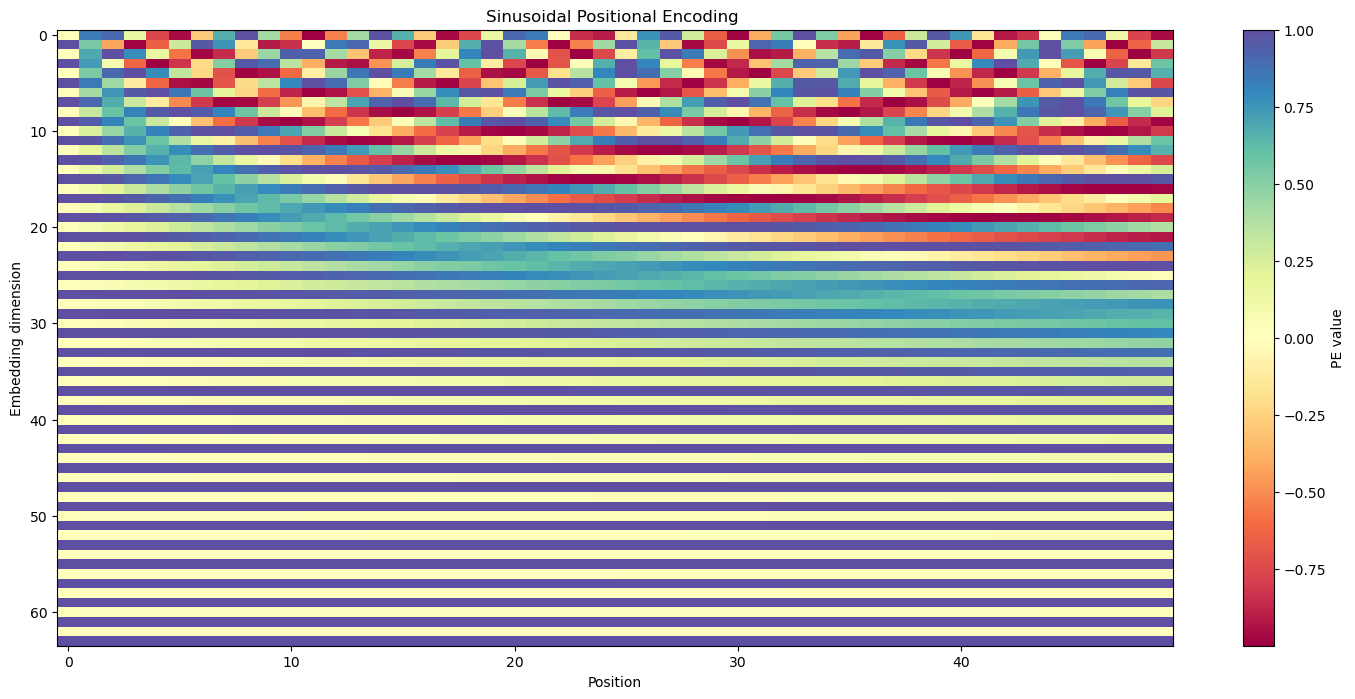

In [50]:
plot_pos()

In [51]:
res=empo(seq_padded[:6])
res

tensor([[[ 1.5243e-01,  8.2866e-02, -6.7678e-01,  ...,  2.5772e+00,
          -2.3378e-01,  2.6594e+00],
         [ 3.7397e-02,  2.4458e+00,  9.7914e-01,  ...,  3.3655e-01,
          -4.7219e-01,  2.5946e+00],
         [ 2.5029e-01,  1.5501e+00,  8.6152e-01,  ...,  1.4366e+00,
          -7.6830e-01,  9.0559e-01],
         ...,
         [ 2.5286e-01,  7.4685e-01,  6.3339e-01,  ...,  1.5304e+00,
          -8.7014e-02, -3.4722e-01],
         [-4.2064e-01,  1.4293e+00, -2.7413e-01,  ...,  1.5304e+00,
          -8.6910e-02, -3.4722e-01],
         [-2.1023e-01,  2.3648e+00, -6.3298e-01,  ...,  1.5304e+00,
          -8.6806e-02, -3.4722e-01]],

        [[ 1.5243e-01,  8.2866e-02, -6.7678e-01,  ...,  2.5772e+00,
          -2.3378e-01,  2.6594e+00],
         [ 1.3213e+00, -9.4128e-01,  1.8547e-01,  ...,  1.5341e+00,
           6.3699e-02, -4.5663e-01],
         [ 1.9853e+00,  1.5800e-01,  1.6324e+00,  ..., -1.1584e-01,
           1.6674e+00, -2.2808e+00],
         ...,
         [ 2.5286e-01,  7

### self-attention

In [52]:
class SelfAttention(nn.Module):
    def __init__(self, embdim):
        super().__init__()

        self.Wq = nn.Linear(embdim, embdim)
        self.Wk = nn.Linear(embdim, embdim)
        self.Wv = nn.Linear(embdim, embdim)

        self.scale = math.sqrt(embdim)

    def forward(self, x):
        # x: (B, T, D)

        Q = self.Wq(x)
        K = self.Wk(x)
        V = self.Wv(x)

        scores = torch.matmul(Q, K.transpose(-2, -1))
        scores = scores / self.scale

        weights = F.softmax(scores, dim=-1)
        output = torch.matmul(weights, V)

        return output


In [53]:
selfat=SelfAttention(512)

In [54]:
ans=selfat(res)

In [55]:
ans

tensor([[[-9.8972e-02, -5.1352e-01, -4.0290e-02,  ..., -4.4942e-01,
           2.8943e-01, -1.9935e-03],
         [-1.9837e-01, -5.0773e-01, -4.3663e-02,  ..., -4.3753e-01,
           2.6820e-01,  1.0677e-02],
         [-1.9973e-01, -4.6298e-01,  5.5041e-02,  ..., -4.6576e-01,
           1.5625e-01,  2.6421e-02],
         ...,
         [-1.7466e-01, -4.4846e-01,  5.9041e-02,  ..., -4.8109e-01,
           1.9292e-01,  9.1083e-02],
         [-1.8787e-01, -4.4489e-01,  6.7260e-02,  ..., -4.8309e-01,
           1.7967e-01,  9.7069e-02],
         [-1.9807e-01, -4.4667e-01,  6.0874e-02,  ..., -4.8317e-01,
           1.8760e-01,  9.2783e-02]],

        [[-3.1314e-01, -5.4336e-01, -1.1440e-02,  ..., -5.8180e-01,
           2.8286e-01, -7.8155e-03],
         [-3.7901e-01, -4.7561e-01,  5.9567e-02,  ..., -6.6595e-01,
           2.3090e-01,  8.3411e-03],
         [-2.6502e-01, -5.5840e-01, -5.1052e-02,  ..., -5.4698e-01,
           3.7870e-01, -3.1469e-02],
         ...,
         [-4.0662e-01, -4

## multi-head-attention

In [56]:
class MultiHeadAttention(nn.Module):
    def __init__(self, embdim, num_heads):
        super().__init__()

        self.num_heads = num_heads
        self.head_dim = embdim // num_heads

        self.heads = nn.ModuleList([
            SelfAttention(self.head_dim) for _ in range(num_heads)
        ])
        
        self.output_linear = nn.Linear(embdim , embdim)
        # custom layer for better performance
        self.deep_output_linear = nn.Sequential( nn.Linear(embdim * self.num_heads, embdim * self.num_heads * 2),
                                            nn.ReLU(),
                                            nn.Linear(embdim * self.num_heads * 2, embdim * self.num_heads),
                                            nn.ReLU(),
                                            nn.Linear(embdim * self.num_heads, embdim) )

    def forward(self, x):
        B, T, D = x.shape

        # split embedding into heads
        x = x.reshape(B, T, self.num_heads, self.head_dim)
        x = x.transpose(1, 2)  # (B, H, T, D_head)

        head_outputs = []

        for i, head in enumerate(self.heads):
            head_x = x[:, i, :, :]  # (B, T, D_head)
            head_outputs.append(head(head_x))

        concatenated = torch.cat(head_outputs, dim=-1)
        return self.output_linear(concatenated)


In [57]:
multiat=MultiHeadAttention(512,8)

In [58]:
answer=selfat(res)

In [59]:
answer

tensor([[[-9.8972e-02, -5.1352e-01, -4.0290e-02,  ..., -4.4942e-01,
           2.8943e-01, -1.9935e-03],
         [-1.9837e-01, -5.0773e-01, -4.3663e-02,  ..., -4.3753e-01,
           2.6820e-01,  1.0677e-02],
         [-1.9973e-01, -4.6298e-01,  5.5041e-02,  ..., -4.6576e-01,
           1.5625e-01,  2.6421e-02],
         ...,
         [-1.7466e-01, -4.4846e-01,  5.9041e-02,  ..., -4.8109e-01,
           1.9292e-01,  9.1083e-02],
         [-1.8787e-01, -4.4489e-01,  6.7260e-02,  ..., -4.8309e-01,
           1.7967e-01,  9.7069e-02],
         [-1.9807e-01, -4.4667e-01,  6.0874e-02,  ..., -4.8317e-01,
           1.8760e-01,  9.2783e-02]],

        [[-3.1314e-01, -5.4336e-01, -1.1440e-02,  ..., -5.8180e-01,
           2.8286e-01, -7.8155e-03],
         [-3.7901e-01, -4.7561e-01,  5.9567e-02,  ..., -6.6595e-01,
           2.3090e-01,  8.3411e-03],
         [-2.6502e-01, -5.5840e-01, -5.1052e-02,  ..., -5.4698e-01,
           3.7870e-01, -3.1469e-02],
         ...,
         [-4.0662e-01, -4

## add residual connections and layer normalization

In [60]:
class AddResidual_LayerNorm(nn.Module):
    def __init__(self, embdim):
        super().__init__()
        self.norm = nn.LayerNorm(embdim)

    def forward(self, x, sublayer):
        return x + sublayer(self.norm(x))

In [61]:
adln=AddResidual_LayerNorm(512)

In [62]:
anss=adln(answer,multiat)

In [63]:
anss

tensor([[[-0.2796, -0.1215,  0.0357,  ..., -0.5258,  0.3924,  0.0534],
         [-0.3789, -0.1156,  0.0324,  ..., -0.5140,  0.3712,  0.0662],
         [-0.3798, -0.0713,  0.1308,  ..., -0.5422,  0.2592,  0.0822],
         ...,
         [-0.3550, -0.0563,  0.1351,  ..., -0.5575,  0.2958,  0.1466],
         [-0.3682, -0.0528,  0.1433,  ..., -0.5595,  0.2825,  0.1526],
         [-0.3784, -0.0545,  0.1369,  ..., -0.5596,  0.2905,  0.1483]],

        [[-0.4759, -0.1154, -0.0779,  ..., -0.5455,  0.3818, -0.0446],
         [-0.5415, -0.0476, -0.0071,  ..., -0.6299,  0.3296, -0.0280],
         [-0.4279, -0.1304, -0.1175,  ..., -0.5106,  0.4778, -0.0684],
         ...,
         [-0.5692, -0.0582, -0.0144,  ..., -0.6196,  0.3244, -0.0332],
         [-0.5852, -0.0640, -0.0134,  ..., -0.6155,  0.3094, -0.0361],
         [-0.5784, -0.0769, -0.0252,  ..., -0.5975,  0.3175, -0.0468]],

        [[-0.6007, -0.3508,  0.1071,  ..., -0.6888,  0.4262,  0.2520],
         [-0.5595, -0.2806,  0.0716,  ..., -0

## feed-forward network

In [64]:
class FeedForward(nn.Module):
    def __init__(self, embdim, hidden_dim):
        super().__init__()
        self.output_linear = nn.Sequential(nn.Linear(embdim, hidden_dim),
                                                nn.ReLU(),
                                                nn.Linear(hidden_dim, embdim))

    def forward(self, x):
        return self.output_linear(x)


In [65]:
fefo=FeedForward(512,1024)

In [66]:
answ=fefo(anss)

In [67]:
answ

tensor([[[-0.0551,  0.1068,  0.0476,  ...,  0.2040, -0.0629,  0.1621],
         [-0.0602,  0.1228,  0.0509,  ...,  0.2091, -0.0625,  0.1767],
         [-0.0452,  0.1222,  0.0234,  ...,  0.2691, -0.0389,  0.2029],
         ...,
         [-0.0553,  0.1117,  0.0338,  ...,  0.2260, -0.0426,  0.1754],
         [-0.0563,  0.1122,  0.0326,  ...,  0.2289, -0.0412,  0.1790],
         [-0.0574,  0.1142,  0.0327,  ...,  0.2263, -0.0430,  0.1795]],

        [[-0.1138,  0.0939,  0.0395,  ...,  0.1076, -0.0897,  0.1619],
         [-0.1262,  0.0938,  0.0122,  ...,  0.1147, -0.0969,  0.1880],
         [-0.1262,  0.1043,  0.0371,  ...,  0.0996, -0.0980,  0.1479],
         ...,
         [-0.1221,  0.0849,  0.0213,  ...,  0.1120, -0.0905,  0.1833],
         [-0.1200,  0.0843,  0.0210,  ...,  0.1129, -0.0901,  0.1862],
         [-0.1202,  0.0875,  0.0222,  ...,  0.1084, -0.0925,  0.1842]],

        [[-0.1081,  0.1231, -0.0208,  ...,  0.2017, -0.0019,  0.1471],
         [-0.1015,  0.1385, -0.0092,  ...,  0

In [68]:
ansfefo=adln(answ,fefo)

In [69]:
ansfefo

tensor([[[ 1.0253e-01,  6.0928e-01, -5.4737e-02,  ...,  5.9666e-01,
          -1.6328e-01, -4.9417e-02],
         [ 9.4299e-02,  5.9574e-01, -6.7538e-02,  ...,  6.0589e-01,
          -1.5747e-01, -1.5997e-02],
         [ 1.9873e-01,  6.1213e-01, -3.0299e-02,  ...,  6.6950e-01,
          -6.2692e-02,  2.2205e-02],
         ...,
         [ 1.5389e-01,  6.1898e-01, -7.3907e-02,  ...,  6.1733e-01,
          -1.2212e-01, -2.7748e-02],
         [ 1.5912e-01,  6.1983e-01, -7.3361e-02,  ...,  6.2083e-01,
          -1.1672e-01, -2.3241e-02],
         [ 1.5204e-01,  6.1866e-01, -7.5497e-02,  ...,  6.2148e-01,
          -1.1782e-01, -1.9230e-02]],

        [[ 7.6771e-02,  5.9993e-01, -7.7934e-02,  ...,  4.9308e-01,
          -2.1295e-01, -7.0087e-02],
         [ 9.1372e-02,  5.4272e-01, -5.2741e-02,  ...,  4.9772e-01,
          -2.0161e-01, -1.4522e-02],
         [ 4.9913e-02,  6.2967e-01, -1.2021e-01,  ...,  5.0765e-01,
          -2.3448e-01, -8.1068e-02],
         ...,
         [ 9.7614e-02,  5

## EncoderBlock

In [70]:
class EncoderBlock(nn.Module):
    def __init__(self, embdim, num_heads, ff_hidden_dim):
        super().__init__()
        
        self.mha = MultiHeadAttention(embdim, num_heads)
        self.ff = FeedForward(embdim, ff_hidden_dim)
        self.attn_norm = AddResidual_LayerNorm(embdim)
        self.ff_norm = AddResidual_LayerNorm(embdim)

    def forward(self, x):
        
        # multi-head attention with residual + norm
        x = self.attn_norm(x, self.mha)
        # feed-forward network with residual + norm
        x = self.ff_norm(x, self.ff)
        
        return x


In [71]:
embdim=512
num_heads=8
ff_hidden_dim=1024
vocab_size=27964

In [72]:
embedpossi=embpos(vocab_size,embdim)

In [73]:
answerr=embedpossi(seq_padded[:6])

In [74]:
answerr

tensor([[[ 0.0707,  0.0079,  0.6940,  ...,  1.7390,  0.0318,  0.5699],
         [-0.8175,  0.5852,  1.7178,  ...,  0.2460, -0.7598,  0.0462],
         [ 0.3764,  1.2153, -0.1319,  ...,  1.4701, -0.2055,  0.1050],
         ...,
         [ 0.0488, -2.9285, -0.4684,  ...,  0.0969, -0.3411,  1.9003],
         [-0.6247, -2.2460, -1.3759,  ...,  0.0969, -0.3410,  1.9003],
         [-0.4143, -1.3105, -1.7347,  ...,  0.0969, -0.3409,  1.9003]],

        [[ 0.0707,  0.0079,  0.6940,  ...,  1.7390,  0.0318,  0.5699],
         [-0.7267,  0.8891, -0.8632,  ...,  1.0900,  0.5721,  0.2353],
         [-0.7183,  0.2570,  0.4290,  ...,  0.3763,  0.2990,  0.3753],
         ...,
         [ 0.0488, -2.9285, -0.4684,  ...,  0.0969, -0.3411,  1.9003],
         [-0.6247, -2.2460, -1.3759,  ...,  0.0969, -0.3410,  1.9003],
         [-0.4143, -1.3105, -1.7347,  ...,  0.0969, -0.3409,  1.9003]],

        [[ 0.0707,  0.0079,  0.6940,  ...,  1.7390,  0.0318,  0.5699],
         [ 0.2618, -0.4458,  0.9983,  ..., -0

In [75]:
encoder=EncoderBlock(embdim, num_heads, ff_hidden_dim)

In [76]:
resu=encoder(answerr)

In [77]:
resu

tensor([[[-0.5118, -0.1118,  0.1937,  ...,  1.4505,  0.4316,  0.7614],
         [-1.3834,  0.2143,  1.2635,  ...,  0.0660, -0.2089, -0.1239],
         [-0.2331,  0.9115, -0.6719,  ...,  1.5748, -0.0422,  0.0564],
         ...,
         [-0.3600, -3.1338, -0.8599,  ..., -0.0230, -0.0102,  2.3430],
         [-1.0348, -2.4584, -1.7890,  ..., -0.0235, -0.0581,  2.3489],
         [-0.8297, -1.5180, -2.2249,  ..., -0.0448, -0.1116,  2.3265]],

        [[-0.4494, -0.1377,  0.3126,  ...,  1.5346,  0.3471,  0.8175],
         [-0.9981,  0.7015, -1.1810,  ...,  1.3835,  0.7516,  0.3261],
         [-1.2938, -0.4073,  0.1365,  ...,  0.2613,  0.4270,  0.5592],
         ...,
         [-0.3533, -3.1105, -0.7496,  ...,  0.0876, -0.0965,  2.3734],
         [-1.0316, -2.4368, -1.6824,  ...,  0.0882, -0.1448,  2.3762],
         [-0.8286, -1.4992, -2.1187,  ...,  0.0760, -0.2009,  2.3551]],

        [[-0.4013, -0.0435,  0.2534,  ...,  1.4431,  0.3750,  0.6884],
         [-0.0165, -0.6513,  0.1812,  ..., -0

## BERT

In [78]:
class BERT(nn.Module):
    def __init__(self, vocab_size, embdim=512, num_heads=8, ff_hidden_dim=2048, num_layers=6):
        super().__init__()
        # embedding + positional encoding
        self.emb = embpos(vocab_size, embdim)

        # stacked encoder blocks
        self.layers = nn.ModuleList([
            EncoderBlock(embdim, num_heads, ff_hidden_dim) for _ in range(num_layers)
        ])

    def forward(self, x):

        x = self.emb(x)  # (B, T, D)

        for layer in self.layers:
            x = layer(x)

        return x  # (B, T, D)


In [79]:
vocab_size=27964

In [80]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device='cpu'

In [81]:
model=BERT(vocab_size=vocab_size).to(device)

In [82]:
model

BERT(
  (emb): embpos(
    (embedding): Embedding(27964, 512)
  )
  (layers): ModuleList(
    (0-5): 6 x EncoderBlock(
      (mha): MultiHeadAttention(
        (heads): ModuleList(
          (0-7): 8 x SelfAttention(
            (Wq): Linear(in_features=64, out_features=64, bias=True)
            (Wk): Linear(in_features=64, out_features=64, bias=True)
            (Wv): Linear(in_features=64, out_features=64, bias=True)
          )
        )
        (output_linear): Linear(in_features=512, out_features=512, bias=True)
        (deep_output_linear): Sequential(
          (0): Linear(in_features=4096, out_features=8192, bias=True)
          (1): ReLU()
          (2): Linear(in_features=8192, out_features=4096, bias=True)
          (3): ReLU()
          (4): Linear(in_features=4096, out_features=512, bias=True)
        )
      )
      (ff): FeedForward(
        (output_linear): Sequential(
          (0): Linear(in_features=512, out_features=2048, bias=True)
          (1): ReLU()
          

In [83]:
predd=model(torch.tensor(seq_padded[:6]).to(device))
predd

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6996\2950182132.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predd=model(torch.tensor(seq_padded[:6]).to(device))


tensor([[[ 1.2160e+00,  2.1815e+00,  1.3052e+00,  ...,  9.2979e-01,
           4.8348e-02,  3.0850e+00],
         [ 3.8792e+00,  2.1739e+00,  9.8240e-01,  ...,  7.2262e-01,
           7.8893e-01,  1.7942e+00],
         [ 1.9499e+00,  3.4843e-01, -9.2585e-02,  ..., -1.1417e+00,
           1.6047e-01,  1.7774e+00],
         ...,
         [ 1.3657e+00, -1.5598e+00,  8.6518e-01,  ...,  6.3352e-01,
          -4.4965e-01,  7.5212e-01],
         [ 5.9795e-01, -9.9438e-01,  1.0293e-01,  ...,  7.0746e-01,
          -3.6706e-01,  8.1427e-01],
         [ 6.5707e-01, -1.1177e-01, -1.8160e-01,  ...,  6.5101e-01,
          -3.4772e-01,  8.6734e-01]],

        [[ 1.1018e+00,  2.5267e+00,  1.3449e+00,  ...,  9.4939e-01,
           1.8003e-01,  2.8401e+00],
         [ 2.7782e+00,  9.1471e-01,  1.5654e+00,  ...,  7.9060e-01,
           2.2687e-02,  1.4924e+00],
         [ 3.0287e+00, -4.4042e-01,  2.4701e+00,  ..., -3.3997e-01,
           1.2683e+00,  7.7058e-01],
         ...,
         [ 1.3581e+00, -1

### MLMHead

In [84]:
class MLMHead(nn.Module):
    def __init__(self, embdim, vocab_size, hidden_dim=1024):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(embdim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, vocab_size)  # final logits for each token
        )

    def forward(self, x):
        # x: (B, T, embdim)
        return self.mlp(x)  # (B, T, vocab_size)


In [85]:
mlm_head=MLMHead(embdim, vocab_size).to(device)

In [86]:
outtt=mlm_head(predd)

In [87]:
outtt

tensor([[[ 0.1676,  0.0733,  0.1041,  ..., -0.1671,  0.1319, -0.0081],
         [-0.1135,  0.0270,  0.0710,  ..., -0.1046,  0.1921, -0.1594],
         [ 0.0172,  0.1063, -0.0508,  ..., -0.1364,  0.1268,  0.0505],
         ...,
         [ 0.1104,  0.1407, -0.1187,  ..., -0.0484,  0.0366,  0.0649],
         [ 0.0939,  0.1451, -0.1383,  ..., -0.0454,  0.0478,  0.0674],
         [ 0.0970,  0.1490, -0.1510,  ..., -0.0470,  0.0480,  0.0656]],

        [[ 0.1743,  0.0772,  0.0906,  ..., -0.2017,  0.1139,  0.0026],
         [ 0.0948,  0.0013,  0.0846,  ...,  0.0199,  0.0073, -0.0072],
         [ 0.0345,  0.1872,  0.0941,  ..., -0.0778,  0.0631,  0.1275],
         ...,
         [ 0.1132,  0.1150, -0.1184,  ..., -0.0490,  0.0431,  0.0766],
         [ 0.1067,  0.1148, -0.1295,  ..., -0.0481,  0.0550,  0.0753],
         [ 0.1100,  0.1166, -0.1482,  ..., -0.0477,  0.0622,  0.0771]],

        [[ 0.1597,  0.0723,  0.1198,  ..., -0.1750,  0.1263, -0.0050],
         [ 0.0199,  0.1899,  0.0085,  ..., -0

## traning

In [88]:
from torch.utils.data import DataLoader

### custom dataset

In [89]:
class custom_dataset(torch.utils.data.Dataset):
    def __init__(self, sequences, vocab_size, mask_token_id=27963, mlm_prob=0.15, special_ids=[0,2,3]):
        self.sequences = sequences
        self.vocab_size = vocab_size
        self.mask_token_id = mask_token_id
        self.mlm_prob = mlm_prob
        self.special_ids = special_ids

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        masked_x, mlm_labels = simple_mask(seq, self.vocab_size,
                                           mask_token_id=self.mask_token_id,
                                           mlm_prob=self.mlm_prob,
                                           special_ids=self.special_ids)
        return masked_x, mlm_labels


In [90]:
dataset = custom_dataset(seq_padded, vocab_size=27964)

In [91]:
dataloader=DataLoader(dataset,100)

In [92]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
loss_fn = nn.CrossEntropyLoss(ignore_index=-100)

In [93]:
print(masked_x.max(), masked_x.min())
print(model.emb.embedding.num_embeddings)

tensor(27963) tensor(0)
27964


In [94]:
### recording parameters for BERT

In [95]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

emb.embedding.weight True
layers.0.mha.heads.0.Wq.weight True
layers.0.mha.heads.0.Wq.bias True
layers.0.mha.heads.0.Wk.weight True
layers.0.mha.heads.0.Wk.bias True
layers.0.mha.heads.0.Wv.weight True
layers.0.mha.heads.0.Wv.bias True
layers.0.mha.heads.1.Wq.weight True
layers.0.mha.heads.1.Wq.bias True
layers.0.mha.heads.1.Wk.weight True
layers.0.mha.heads.1.Wk.bias True
layers.0.mha.heads.1.Wv.weight True
layers.0.mha.heads.1.Wv.bias True
layers.0.mha.heads.2.Wq.weight True
layers.0.mha.heads.2.Wq.bias True
layers.0.mha.heads.2.Wk.weight True
layers.0.mha.heads.2.Wk.bias True
layers.0.mha.heads.2.Wv.weight True
layers.0.mha.heads.2.Wv.bias True
layers.0.mha.heads.3.Wq.weight True
layers.0.mha.heads.3.Wq.bias True
layers.0.mha.heads.3.Wk.weight True
layers.0.mha.heads.3.Wk.bias True
layers.0.mha.heads.3.Wv.weight True
layers.0.mha.heads.3.Wv.bias True
layers.0.mha.heads.4.Wq.weight True
layers.0.mha.heads.4.Wq.bias True
layers.0.mha.heads.4.Wk.weight True
layers.0.mha.heads.4.Wk.bias

In [96]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

444416000


In [97]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(trainable_params)

444416000


In [98]:
num_param_tensors = len(list(model.named_parameters()))
print(num_param_tensors)

385


In [99]:
all_trainable = all(p.requires_grad for p in model.parameters())
print("All parameters trainable:", all_trainable)

All parameters trainable: True


## creating model for implementation

In [100]:
class MY_BERT(nn.Module):
    def __init__(self, vocab_size, embdim=512):
        super().__init__()
        # bert
        self.BERT_ = BERT(vocab_size=vocab_size)

        # mlm-head
        self.MY_mlm_head=MLMHead(embdim, vocab_size)

    def forward(self, x):

        x = self.BERT_(x)
        x = self.MY_mlm_head(x)

        return x 


In [101]:
my_model=MY_BERT(vocab_size).to(device)
my_model

MY_BERT(
  (BERT_): BERT(
    (emb): embpos(
      (embedding): Embedding(27964, 512)
    )
    (layers): ModuleList(
      (0-5): 6 x EncoderBlock(
        (mha): MultiHeadAttention(
          (heads): ModuleList(
            (0-7): 8 x SelfAttention(
              (Wq): Linear(in_features=64, out_features=64, bias=True)
              (Wk): Linear(in_features=64, out_features=64, bias=True)
              (Wv): Linear(in_features=64, out_features=64, bias=True)
            )
          )
          (output_linear): Linear(in_features=512, out_features=512, bias=True)
          (deep_output_linear): Sequential(
            (0): Linear(in_features=4096, out_features=8192, bias=True)
            (1): ReLU()
            (2): Linear(in_features=8192, out_features=4096, bias=True)
            (3): ReLU()
            (4): Linear(in_features=4096, out_features=512, bias=True)
          )
        )
        (ff): FeedForward(
          (output_linear): Sequential(
            (0): Linear(in_featur

### recording parameters for MY-MODEL

In [102]:
for name, param in my_model.named_parameters():
    print(name, param.requires_grad)

BERT_.emb.embedding.weight True
BERT_.layers.0.mha.heads.0.Wq.weight True
BERT_.layers.0.mha.heads.0.Wq.bias True
BERT_.layers.0.mha.heads.0.Wk.weight True
BERT_.layers.0.mha.heads.0.Wk.bias True
BERT_.layers.0.mha.heads.0.Wv.weight True
BERT_.layers.0.mha.heads.0.Wv.bias True
BERT_.layers.0.mha.heads.1.Wq.weight True
BERT_.layers.0.mha.heads.1.Wq.bias True
BERT_.layers.0.mha.heads.1.Wk.weight True
BERT_.layers.0.mha.heads.1.Wk.bias True
BERT_.layers.0.mha.heads.1.Wv.weight True
BERT_.layers.0.mha.heads.1.Wv.bias True
BERT_.layers.0.mha.heads.2.Wq.weight True
BERT_.layers.0.mha.heads.2.Wq.bias True
BERT_.layers.0.mha.heads.2.Wk.weight True
BERT_.layers.0.mha.heads.2.Wk.bias True
BERT_.layers.0.mha.heads.2.Wv.weight True
BERT_.layers.0.mha.heads.2.Wv.bias True
BERT_.layers.0.mha.heads.3.Wq.weight True
BERT_.layers.0.mha.heads.3.Wq.bias True
BERT_.layers.0.mha.heads.3.Wk.weight True
BERT_.layers.0.mha.heads.3.Wk.bias True
BERT_.layers.0.mha.heads.3.Wv.weight True
BERT_.layers.0.mha.heads

In [103]:
total_params = sum(p.numel() for p in my_model.parameters())
print(total_params)

474654012


In [104]:
trainable_params = sum(p.numel() for p in my_model.parameters() if p.requires_grad)
print(trainable_params)

474654012


In [105]:
num_param_tensors = len(list(my_model.named_parameters()))
print(num_param_tensors)

391


In [106]:
all_trainable = all(p.requires_grad for p in my_model.parameters())
print("All parameters trainable:", all_trainable)

All parameters trainable: True


### training for Bert only

In [107]:
def mlm_accuracy(logits, labels):

    preds = logits.argmax(dim=-1)  # (B, T)

    mask = labels != -100

    if mask.sum() == 0:
        return 0.0

    correct = (preds[mask] == labels[mask]).sum().item()
    total = mask.sum().item()

    return correct / total


In [108]:
def train(EPOCH, batch_size):
    model.train()

    for epoch in range(EPOCH):
        total_loss = 0.0
        total_acc = 0.0

        for step, (masked_x, mlm_labels) in enumerate(dataloader):
            masked_x = masked_x.to(device)
            mlm_labels = mlm_labels.to(device)
            model.train()
            mlm_head.train()
            optimizer.zero_grad()

            # forward
            enc_out = model(masked_x)      # (B,T,D)
            logits = mlm_head(enc_out)     # (B,T,V)

            # loss
            loss = loss_fn(logits.view(-1, logits.size(-1)),  mlm_labels.view(-1) )

            # backward
            loss.backward()
            optimizer.step()

            # metrics
            acc = mlm_accuracy(logits, mlm_labels)

            total_loss += loss.item()
            total_acc += acc

            # batch progress
            if (step + 1) % batch_size == 0:
                print(f"Epoch: {epoch+1}/{EPOCH} | Step : {step+1}/{len(dataloader)} | Loss: {loss.item():.4f} | Acc: {acc:.4f}")

        avg_loss = total_loss / len(dataloader)
        avg_acc = total_acc / len(dataloader)

        print(f"\nEpoch: {epoch+1} | Avg Loss: {avg_loss:.4f} | Avg Acc: {avg_acc:.4f}\n")

    return train, mlm_accuracy


In [109]:
%%time
train(EPOCH=5, batch_size=100)

Epoch: 1/5 | Step : 100/1145 | Loss: 9.9889 | Acc: 0.0263
Epoch: 1/5 | Step : 200/1145 | Loss: 9.8518 | Acc: 0.0423
Epoch: 1/5 | Step : 300/1145 | Loss: 9.5277 | Acc: 0.0410
Epoch: 1/5 | Step : 400/1145 | Loss: 9.4870 | Acc: 0.0397
Epoch: 1/5 | Step : 500/1145 | Loss: 9.4938 | Acc: 0.0333
Epoch: 1/5 | Step : 600/1145 | Loss: 9.6755 | Acc: 0.0342
Epoch: 1/5 | Step : 700/1145 | Loss: 9.8906 | Acc: 0.0129
Epoch: 1/5 | Step : 800/1145 | Loss: 9.4334 | Acc: 0.0388
Epoch: 1/5 | Step : 900/1145 | Loss: 9.4166 | Acc: 0.0185
Epoch: 1/5 | Step : 1000/1145 | Loss: 9.4784 | Acc: 0.0345
Epoch: 1/5 | Step : 1100/1145 | Loss: 9.7030 | Acc: 0.0270

Epoch: 1 | Avg Loss: 9.7288 | Avg Acc: 0.0296

Epoch: 2/5 | Step : 100/1145 | Loss: 9.4851 | Acc: 0.0339
Epoch: 2/5 | Step : 200/1145 | Loss: 9.8613 | Acc: 0.0168
Epoch: 2/5 | Step : 300/1145 | Loss: 9.4639 | Acc: 0.0226
Epoch: 2/5 | Step : 400/1145 | Loss: 9.7922 | Acc: 0.0259
Epoch: 2/5 | Step : 500/1145 | Loss: 9.2797 | Acc: 0.0072
Epoch: 2/5 | Step : 60

(<function __main__.train(EPOCH, batch_size)>,
 <function __main__.mlm_accuracy(logits, labels)>)

## Traing for MY-MODEL

In [111]:
optimizer = torch.optim.Adam(my_model.parameters(), lr=1e-5)
loss_fn = nn.CrossEntropyLoss(ignore_index=-100)

In [112]:
def train2(EPOCH, batch_size):
    model.train()

    for epoch in range(EPOCH):
        total_loss = 0.0
        total_acc = 0.0

        for step, (masked_x, mlm_labels) in enumerate(dataloader):
            masked_x = masked_x.to(device)
            mlm_labels = mlm_labels.to(device)
            my_model.train()
            optimizer.zero_grad()

            # forward
            logits = my_model(masked_x)      # (B,T,D)
            
            # loss
            loss = loss_fn(logits.view(-1, logits.size(-1)),  mlm_labels.view(-1) )

            # backward
            loss.backward()
            optimizer.step()

            # metrics
            acc = mlm_accuracy(logits, mlm_labels)

            total_loss += loss.item()
            total_acc += acc

            # batch progress
            if (step + 1) % batch_size == 0:
                print(f"Epoch: {epoch+1}/{EPOCH} | Step : {step+1}/{len(dataloader)} | Loss: {loss.item():.4f} | Acc: {acc:.4f}")

        avg_loss = total_loss / len(dataloader)
        avg_acc = total_acc / len(dataloader)

        print(f"\nEpoch: {epoch+1} | Avg Loss: {avg_loss:.4f} | Avg Acc: {avg_acc:.4f}\n")

    return train, mlm_accuracy


In [113]:
%%time
train2(EPOCH=5, batch_size=100)

Epoch: 1/5 | Step : 100/1145 | Loss: 8.3206 | Acc: 0.0513
Epoch: 1/5 | Step : 200/1145 | Loss: 7.3094 | Acc: 0.0086
Epoch: 1/5 | Step : 300/1145 | Loss: 7.2164 | Acc: 0.0413
Epoch: 1/5 | Step : 400/1145 | Loss: 7.1323 | Acc: 0.0500
Epoch: 1/5 | Step : 500/1145 | Loss: 7.5527 | Acc: 0.0667
Epoch: 1/5 | Step : 600/1145 | Loss: 7.8168 | Acc: 0.0345
Epoch: 1/5 | Step : 700/1145 | Loss: 7.0425 | Acc: 0.0376
Epoch: 1/5 | Step : 800/1145 | Loss: 7.0095 | Acc: 0.0242
Epoch: 1/5 | Step : 900/1145 | Loss: 7.3603 | Acc: 0.0413
Epoch: 1/5 | Step : 1000/1145 | Loss: 7.3118 | Acc: 0.0377
Epoch: 1/5 | Step : 1100/1145 | Loss: 6.8196 | Acc: 0.0320

Epoch: 1 | Avg Loss: 7.4748 | Avg Acc: 0.0316

Epoch: 2/5 | Step : 100/1145 | Loss: 6.5883 | Acc: 0.0465
Epoch: 2/5 | Step : 200/1145 | Loss: 6.8491 | Acc: 0.0076
Epoch: 2/5 | Step : 300/1145 | Loss: 6.8825 | Acc: 0.0598
Epoch: 2/5 | Step : 400/1145 | Loss: 6.9375 | Acc: 0.0484
Epoch: 2/5 | Step : 500/1145 | Loss: 7.1549 | Acc: 0.0391
Epoch: 2/5 | Step : 60

(<function __main__.train(EPOCH, batch_size)>,
 <function __main__.mlm_accuracy(logits, labels)>)

# save models

In [114]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path1= root / "Bert.pth"
path2= root / "mask.pth"
path3= root / "mybert.pth"

In [115]:
torch.save(model,path1)

In [116]:
torch.save(mlm_head,path2)

In [117]:
torch.save(my_model,path3)